# EDA (Exploratory Data Analysis)

Vamos a realizar un análisis exploratorio de los datos para entender mejor el problema y los datos que tenemos disponibles.

In [4]:
from _utils import *
import pandas as pd

## **`Cargar los datos`**
Primero cargamos los datos y vemos sus dimensiones.

In [5]:
# Cargamos la informacion de las monedas actualmente
# df_coins: pd.DataFrame = pd.read_json('../../datasets/json/coins_clean.json', orient='records')
# Cargamos la informacion de cada moneda durante cada halving
df_halving: pd.DataFrame = pd.read_json('./metadata/halving.json', orient='records')

In [6]:
# df_coins.shape

In [7]:
df_halving.shape

(2129, 4)

## **`Explorar los datos`**
Luego, exploramos los datos para entender mejor las características de los datos.

In [8]:
# df_coins.head(3)

`df_coins` es un DataFrame que contiene la información de las monedas.

In [9]:
df_halving.head(3)

,2012-02-12,2016-02-07,2020-03-05,2024-04-20
0,"{'id': '0016aff8-c747-4a03-8e66-e17abaa3e346',...","{'id': '0016aff8-c747-4a03-8e66-e17abaa3e346',...","{'id': '0016aff8-c747-4a03-8e66-e17abaa3e346',...","{'id': '0016aff8-c747-4a03-8e66-e17abaa3e346',..."
1,"{'id': '001adcf3-e807-41b4-a865-92bfce293a55',...","{'id': '001adcf3-e807-41b4-a865-92bfce293a55',...","{'id': '001adcf3-e807-41b4-a865-92bfce293a55',...","{'id': '001adcf3-e807-41b4-a865-92bfce293a55',..."
2,"{'id': '0027fc83-a360-4197-8bb1-b2efaa767558',...","{'id': '0027fc83-a360-4197-8bb1-b2efaa767558',...","{'id': '0027fc83-a360-4197-8bb1-b2efaa767558',...","{'id': '0027fc83-a360-4197-8bb1-b2efaa767558',..."


`df_halving` es un DataFrame que contiene la información del mercado durante cada halving *(2012, 2016, 2020, 2024)* 

## **`Preprocesamiento de los datos`**
Finalmente, realizamos un preprocesamiento de los datos para poder utilizarlos en el entrenamiento de un modelo de machine learning.


Primero vamos a convertir cada halving en un dataset de serie de tiempo para manejar mas facilmente la data

In [10]:
def proccess_coin_in_time(coin: dict) -> list[dict]:
    new_df: list = []
    timestamp = coin["halving"]
    if type(timestamp) == str:
        return new_df
    else:
        for time in timestamp:
            new_coin = coin.copy()
            del new_coin["contractAddresses"]
            del new_coin["halving"]
            del new_coin["allTimeHighData"]
            del new_coin["cycleLowData"]
            new_coin["datetime"] = datetime.fromtimestamp(time["timestamp"])
            new_coin["open"] = time["open"]
            new_coin["high"] = time["high"]
            new_coin["low"] = time["low"]
            new_coin["close"] = time["close"]
            new_coin["volume"] = time["volume"]
            new_df.append(new_coin)
    return new_df

In [11]:
def generate_halving_df(halving: pd.Series) -> pd.DataFrame:
    df = pd.DataFrame()
    for coin in halving:
        new_df= proccess_coin_in_time(coin)
        df = pd.concat([df, pd.DataFrame(new_df)])
    return df

In [12]:
def generate_datasets(dataset: pd.DataFrame) -> None:
    # Generamos los datasets de los halving de menor capitalizacion
    for i, halving in enumerate(dataset):
        df_halving: pd.DataFrame = generate_halving_df(dataset[halving])
        df_halving.to_json(f"./datasets/{i+1}_halving.json", orient="records")

In [ ]:
generate_datasets(df_halving)

Eliminamos variables para evitar problemas de memoria

In [14]:
del df_halving

## **`Visualización de los datos`**
Visualizamos los datos para entender mejor las características de los datos y cómo se relacionan entre sí.

In [15]:
import matplotlib.pyplot as plt

In [16]:
df_halving_1 = pd.read_json('./datasets/1_halving.json', orient='records')
df_halving_2 = pd.read_json('./datasets/2_halving.json', orient='records')
df_halving_3 = pd.read_json('./datasets/3_halving.json', orient='records')
df_halving_4 = pd.read_json('./datasets/4_halving.json', orient='records')

In [17]:
df_halving_1.shape, df_halving_2.shape, df_halving_3.shape, df_halving_4.shape

((543, 11), (9785, 11), (124389, 11), (88987, 11))

Visualizaremos el rendimiento de cada moneda durante el halving

In [18]:
df_halving_1.set_index("datetime", inplace=True)
df_halving_2.set_index("datetime", inplace=True)
df_halving_3.set_index("datetime", inplace=True)
df_halving_4.set_index("datetime", inplace=True)

In [19]:
def plot_by_coins(coin_1: str, coin_2: str) -> None:
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    ax = plt.gca()
    ax.set_yscale('log')
    
    # Ordena y grafica para coin_1 en High Halving 1
    df_high_halving_1_sorted = df_halving_1[df_halving_1["name"] == coin_1].sort_index()
    df_low_halving_1_sorted = df_halving_1[df_halving_1["name"] == coin_2].sort_index()
    axs[0, 0].plot(df_high_halving_1_sorted["close"], label=f"{coin_1}")
    axs[0, 0].plot(df_low_halving_1_sorted["close"], label=f"{coin_2}")
    axs[0, 0].set_title(f"{coin_1} vs {coin_2} - High Halving 1")
    axs[0, 0].legend()

    # Ordena y grafica para coin_1 en High Halving 2 y coin_2 en Low Halving 2
    df_high_halving_2_sorted = df_halving_2[df_halving_2["name"] == coin_1].sort_index()
    df_low_halving_2_sorted = df_halving_2[df_halving_2["name"] == coin_2].sort_index()
    axs[0, 1].plot(df_high_halving_2_sorted["close"], label=f"{coin_1}")
    axs[0, 1].plot(df_low_halving_2_sorted["close"], label=f"{coin_2}")
    axs[0, 1].set_title(f"{coin_1} vs {coin_2} - High Halving 2")
    axs[0, 1].legend()

    # Ordena y grafica para coin_1 en High Halving 3 y coin_2 en Low Halving 3
    df_high_halving_3_sorted = df_halving_3[df_halving_3["name"] == coin_1].sort_index()
    df_low_halving_3_sorted = df_halving_3[df_halving_3["name"] == coin_2].sort_index()
    axs[1, 0].plot(df_high_halving_3_sorted["close"], label=f"{coin_1}")
    axs[1, 0].plot(df_low_halving_3_sorted["close"], label=f"{coin_2}")
    axs[1, 0].set_title(f"{coin_1} vs {coin_2} - High Halving 3")
    axs[1, 0].legend()

    # Ordena y grafica para coin_1 y coin_2 en High Halving 4 y Low Halving 4 respectivamente
    # Aquí, df_low_halving_4_sorted ya está ordenado de antes, así que lo reutilizamos
    df_high_halving_4_sorted = df_halving_4[df_halving_4["name"] == coin_1].sort_index()
    df_low_halving_4_sorted = df_halving_4[df_halving_4["name"] == coin_2].sort_index()
    axs[1, 1].plot(df_high_halving_4_sorted["close"], label=f"{coin_1}")
    axs[1, 1].plot(df_low_halving_4_sorted["close"], label=f"{coin_2}")
    axs[1, 1].set_title(f"{coin_1} vs {coin_2} - High Halving 4")
    axs[1, 1].legend()

    plt.show()

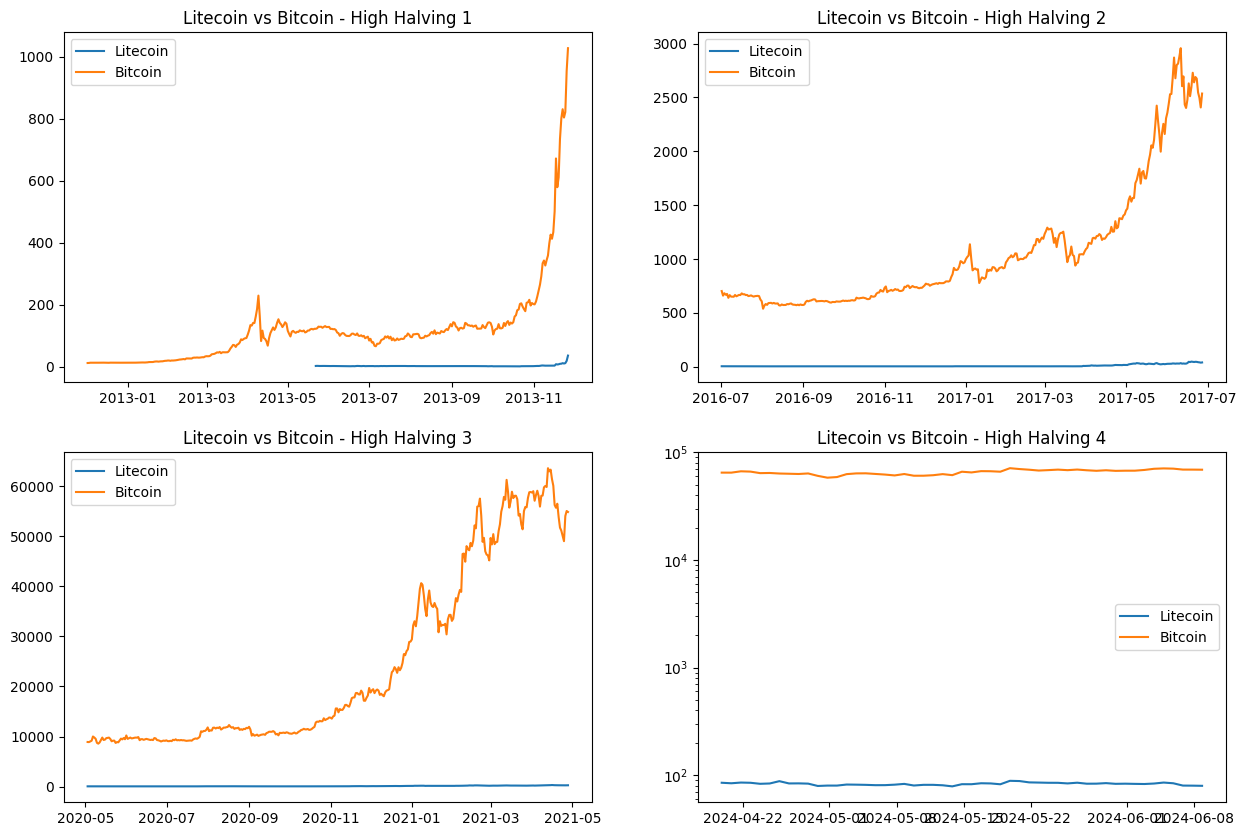

In [20]:
plot_by_coins("Litecoin","Bitcoin")

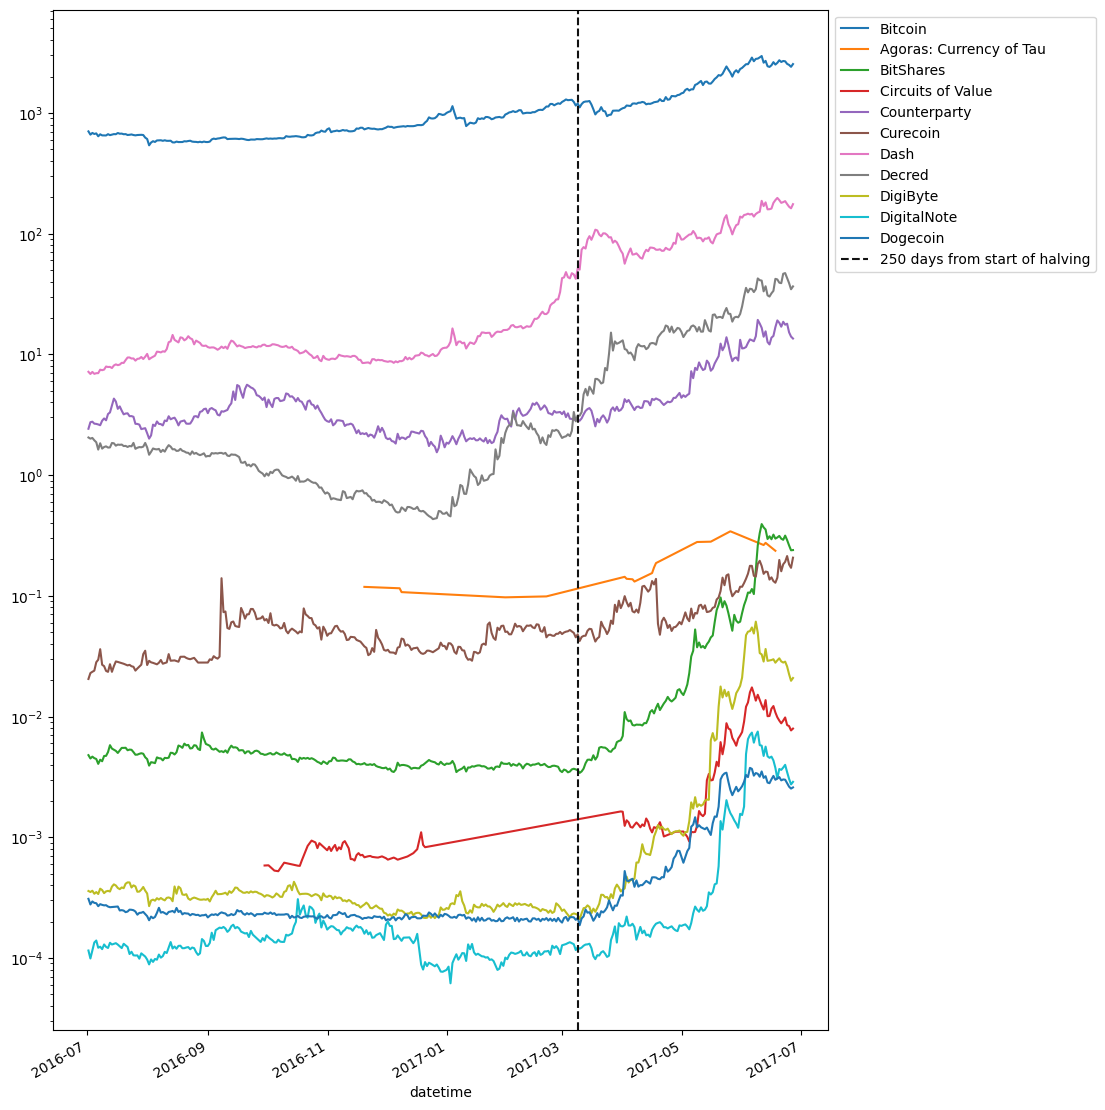

In [35]:
def plot_by_halving(halving: pd.DataFrame, always_show_coin: str = "Bitcoin", limit_coins: int = 10):
    plt.figure(figsize=(10, 15))
    ax = plt.gca()
    ax.set_yscale('log')

    # Encuentra la fecha mínima (inicio) entre todos los grupos
    start_date = halving.index.min()
    # Calcula la fecha objetivo sumando 250 días a la fecha de inicio
    target_date = start_date + pd.DateOffset(days=250)

    # Extrae y plotea el grupo para la moneda que siempre se debe mostrar
    always_show_group = halving[halving['name'] == always_show_coin]
    if not always_show_group.empty:
        always_show_group.sort_index().plot.line(y="close", label=always_show_coin, ax=ax)

    # Inicializa un contador para los grupos
    counter = 0
    for name, group in halving.groupby("name"):
        if name != always_show_coin:  # Evita incluir la moneda que ya se ha ploteado
            if counter < limit_coins:  # Verifica si aún no se ha alcanzado el límite
                sorted_group = group.sort_index()
                sorted_group.plot.line(y="close", label=name, ax=ax)
                counter += 1  # Incrementa el contador
            else:
                break  # Sale del bucle una vez que se alcanza el límite de monedas

    # Trazar una línea vertical en la fecha objetivo
    ax.axvline(x=target_date, color='#111', linestyle='--', label='250 days from start of halving')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
# Asumiendo que df_high_halving_2 está definido previamente y correctamente indexado por fecha
plot_by_halving(df_halving_2)